## **Predicting the price of foodstuff in the Ghana market**
Predicting the price of foodstuff in the Ghana market
In recent months, price volatility of foodstuff is becoming increasingly relevant to producers and consumers in the
amidst the outbreak of the Covid-19. This work predicts the future price of food commodity in the country.

In [2]:
#import required libararies
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
#reading data files
store_df=pd.read_csv("../Predicting price of food/Data/wfp_food_prices_ghana.csv")
train_df=pd.read_csv("../Predicting price of food/Data/wfp_food_median_prices_ghana.csv")

In [9]:
store_df.head()

,date,cmname,unit,category,price,currency,country,admname,adm1id,mktname,mktid,cmid,ptid,umid,catid,sn,default
0,1/15/2006,Maize - Wholesale,100 KG,cereals and tubers,25.40,GHS,Ghana,Ashanti,1324,Kumasi,215,51,14,9,1,215_51_14_9,NaN
1,2/15/2006,Maize - Wholesale,100 KG,cereals and tubers,21.75,GHS,Ghana,Ashanti,1324,Kumasi,215,51,14,9,1,215_51_14_9,NaN
2,3/15/2006,Maize - Wholesale,100 KG,cereals and tubers,21.21,GHS,Ghana,Ashanti,1324,Kumasi,215,51,14,9,1,215_51_14_9,NaN
3,4/15/2006,Maize - Wholesale,100 KG,cereals and tubers,20.88,GHS,Ghana,Ashanti,1324,Kumasi,215,51,14,9,1,215_51_14_9,NaN
4,5/15/2006,Maize - Wholesale,100 KG,cereals and tubers,22.00,GHS,Ghana,Ashanti,1324,Kumasi,215,51,14,9,1,215_51_14_9,NaN


In [10]:
store_df.describe()

,price,adm1id,mktid,cmid,ptid,umid,catid,default
count,13181.000000,13181.000000,13181.000000,13181.000000,13181.0,13181.000000,13181.000000,0.0
mean,111.078582,1327.402322,238.046506,77.581291,14.0,32.151506,1.406039,NaN
std,114.820640,2.780535,180.090006,26.674512,0.0,29.557660,1.026318,NaN
min,0.870000,1324.000000,209.000000,51.000000,14.0,9.000000,1.000000,NaN
25%,35.600000,1325.000000,213.000000,64.000000,14.0,20.000000,1.000000,NaN
50%,75.000000,1327.000000,217.000000,71.000000,14.0,22.000000,1.000000,NaN
75%,152.000000,1330.000000,220.000000,98.000000,14.0,23.000000,1.000000,NaN
max,1206.209000,1333.000000,1740.000000,203.000000,14.0,133.000000,4.000000,NaN


In [11]:
#Checking the no. of NaN vales
store_df.isna().sum()

date            0
cmname          0
unit            0
category        0
price           0
currency        0
country         0
admname         0
adm1id          0
mktname         0
mktid           0
cmid            0
ptid            0
umid            0
catid           0
sn              0
default     13181
dtype: int64

In [12]:
train_df.head()

,adm1id,admname,category,catid,cmid,cmname,cmnameshort,country,currency,date,...,mktid,mktname,price,ptid,scaling,sn,umid,unit,x,year
0,1326.0,Central,cereals and tubers,1,68,Cassava - Wholesale,Cassava Whs.,Ghana,GHS,1/15/2015,...,214.0,Mankessim,36.000,14.0,1,214_68_14_23,23.0,91 KG,1.421280e+09,2015.0
1,1325.0,Brong Ahafo,cereals and tubers,1,68,Cassava - Wholesale,Cassava Whs.,Ghana,GHS,2/15/2015,...,218.0,Techiman,36.000,14.0,1,218_68_14_23,23.0,91 KG,1.423958e+09,2015.0
2,1326.0,Central,cereals and tubers,1,68,Cassava - Wholesale,Cassava Whs.,Ghana,GHS,3/15/2015,...,213.0,Cape Coast,38.750,14.0,1,213_68_14_23,23.0,91 KG,1.426378e+09,2015.0
3,1326.0,Central,cereals and tubers,1,68,Cassava - Wholesale,Cassava Whs.,Ghana,GHS,4/15/2015,...,213.0,Cape Coast,39.125,14.0,1,213_68_14_23,23.0,91 KG,1.429056e+09,2015.0
4,1326.0,Central,cereals and tubers,1,68,Cassava - Wholesale,Cassava Whs.,Ghana,GHS,5/15/2015,...,214.0,Mankessim,39.920,14.0,1,214_68_14_23,23.0,91 KG,1.431648e+09,2015.0


In [13]:
train_df.describe()

,adm1id,catid,cmid,default,interpolated,mktid,price,ptid,scaling,umid,x,year
count,537.000000,693.000000,693.000000,0.0,693.000000,537.000000,693.000000,537.0,693.0,537.000000,5.370000e+02,537.000000
mean,1326.506518,1.272727,87.454545,NaN,0.225108,253.124767,190.917557,14.0,1.0,43.687151,1.501908e+09,2017.121043
std,2.536387,0.863062,39.618225,NaN,0.417955,233.032694,149.182774,0.0,0.0,37.613744,4.708859e+07,1.494475
min,1324.000000,1.000000,51.000000,NaN,0.000000,209.000000,9.000000,14.0,1.0,9.000000,1.421280e+09,2015.000000
25%,1324.000000,1.000000,65.000000,NaN,0.000000,214.000000,100.000000,14.0,1.0,21.000000,1.463270e+09,2016.000000
50%,1325.000000,1.000000,71.000000,NaN,0.000000,217.000000,150.023715,14.0,1.0,22.000000,1.500077e+09,2017.000000
75%,1328.000000,1.000000,99.000000,NaN,0.000000,220.000000,222.000000,14.0,1.0,79.000000,1.542240e+09,2018.000000
max,1333.000000,4.000000,203.000000,NaN,1.000000,1739.000000,800.000000,14.0,1.0,133.000000,1.584230e+09,2020.000000


In [14]:
print('The shape of our testing set: ',store_df.shape[0], 'cmname', 'and', store_df.shape[1], 'features')
print('The shape of our training set: ',train_df.shape[0], 'cmname', 'and', train_df.shape[1], 'features')
print('The testing set has 1 feature less than the training set, which is SalePrice, the target to predict  ')

The shape of our testing set:  13181 cmname and 17 features
The shape of our training set:  693 cmname and 23 features
The testing set has 1 feature less than the training set, which is SalePrice, the target to predict  


In [15]:
#Checking the no. of NaN values
train_df.isna().sum()

adm1id          156
admname         156
category          0
catid             0
cmid              0
cmname            0
cmnameshort       0
country         156
currency        156
date              0
default         693
interpolated      0
label             0
mktid           156
mktname         156
price             0
ptid            156
scaling           0
sn              156
umid            156
unit              0
x               156
year            156
dtype: int64

In [18]:
#Merging both the Dataframes into one based on the "Store" ID
df=store_df.merge(train_df,on=["category"],how="inner")
df.head()

,date_x,cmname_x,unit_x,category,price_x,currency_x,country_x,admname_x,adm1id_x,mktname_x,...,mktid_y,mktname_y,price_y,ptid_y,scaling,sn_y,umid_y,unit_y,x,year
0,1/15/2006,Maize - Wholesale,100 KG,cereals and tubers,25.4,GHS,Ghana,Ashanti,1324,Kumasi,...,214.0,Mankessim,36.000,14.0,1,214_68_14_23,23.0,91 KG,1.421280e+09,2015.0
1,1/15/2006,Maize - Wholesale,100 KG,cereals and tubers,25.4,GHS,Ghana,Ashanti,1324,Kumasi,...,218.0,Techiman,36.000,14.0,1,218_68_14_23,23.0,91 KG,1.423958e+09,2015.0
2,1/15/2006,Maize - Wholesale,100 KG,cereals and tubers,25.4,GHS,Ghana,Ashanti,1324,Kumasi,...,213.0,Cape Coast,38.750,14.0,1,213_68_14_23,23.0,91 KG,1.426378e+09,2015.0
3,1/15/2006,Maize - Wholesale,100 KG,cereals and tubers,25.4,GHS,Ghana,Ashanti,1324,Kumasi,...,213.0,Cape Coast,39.125,14.0,1,213_68_14_23,23.0,91 KG,1.429056e+09,2015.0
4,1/15/2006,Maize - Wholesale,100 KG,cereals and tubers,25.4,GHS,Ghana,Ashanti,1324,Kumasi,...,214.0,Mankessim,39.920,14.0,1,214_68_14_23,23.0,91 KG,1.431648e+09,2015.0


In [19]:
#(rowsxcolumns) of the merged DataFrame
df.shape

(7292502, 39)

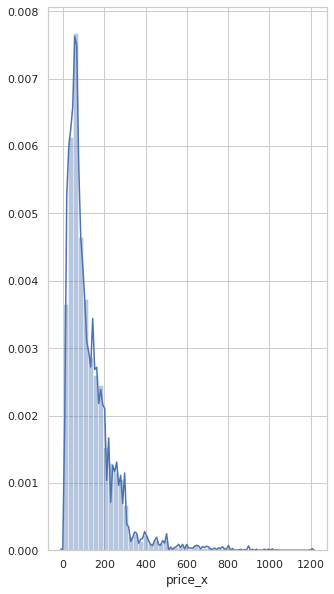

In [20]:
#Find the range of data
plt.figure(figsize=(5,10))
sns.set(style="whitegrid")
sns.distplot(df["price_x"])

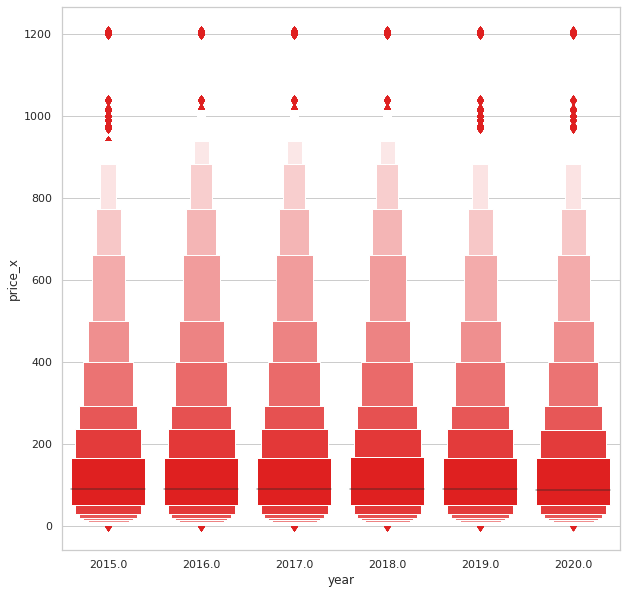

In [21]:
plt.figure(figsize=(10,10))
sns.set(style="whitegrid")
sns.boxenplot(data=df,scale="linear",x="year",y="price_x",color="red")

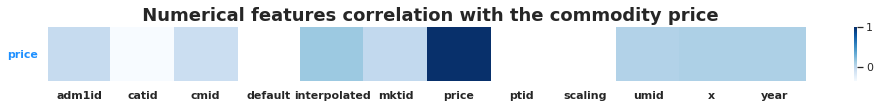

In [22]:
num=train_df.select_dtypes(exclude='object')
numcorr=num.corr()
f,ax=plt.subplots(figsize=(17,1))
sns.heatmap(numcorr.sort_values(by=['price'], ascending=False).head(1), cmap='Blues')
plt.title(" Numerical features correlation with the commodity price", weight='bold', fontsize=18)
plt.xticks(weight='bold')
plt.yticks(weight='bold', color='dodgerblue', rotation=0)


plt.show()

In [23]:
Num=numcorr['price'].sort_values(ascending=False).head(10).to_frame()

cm = sns.light_palette("cyan", as_cmap=True)

s = Num.style.background_gradient(cmap=cm)
s

,price
price,1.000000
interpolated,0.157054
x,0.089180
year,0.086132
umid,0.067492
mktid,-0.002373
adm1id,-0.021290
cmid,-0.055512
catid,-0.362812
default,nan


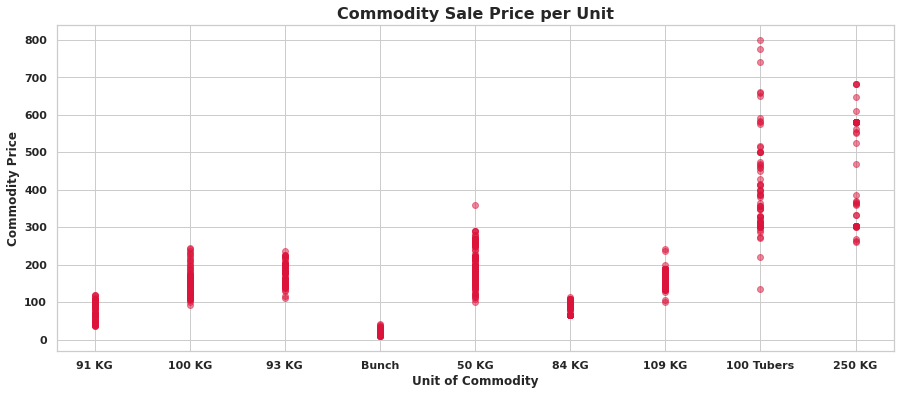

In [24]:
plt.figure(figsize=(15,6))
plt.scatter(x=train_df['unit'], y=train_df['price'], color='crimson', alpha=0.5)
plt.title('Commodity Sale Price per Unit', weight='bold', fontsize=16)
plt.xlabel('Unit of Commodity', weight='bold', fontsize=12)
plt.ylabel('Commodity Price', weight='bold', fontsize=12)
plt.xticks(weight='bold')
plt.yticks(weight='bold')
plt.show()

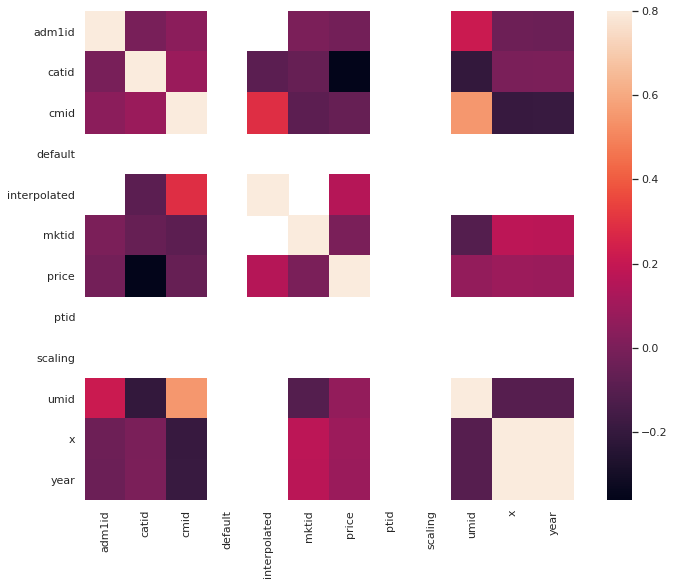

In [25]:
# Correlation Matrix Heatmap
corrmat = train_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

## m*m*m*m*u*m*m*m*m*m*m*m*m*m*m*m*m*m*m*m*m*m*m*m*m*m*m*m*s*m*m*m*m*m*m*m*m*m*m*m*m*m*m*m*m*m*m*a*m*m*m*m*m*m*m*h*mm #